<a href="https://colab.research.google.com/github/NadavAharoni/Computational-Models/blob/main/ComputationalModels01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture

!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!pip install automata-lib
!pip install pygraphviz pydot coloraide ezsettings

#!sudo apt install libcairo2-dev ffmpeg \
#    texlive texlive-latex-extra texlive-fonts-extra \
#    texlive-latex-recommended texlive-science \
#    tipa libpango1.0-dev

!sudo apt install libcairo2-dev ffmpeg tipa libpango1.0-dev
!pip install manim
#pip install https://samyzaf.com/pyfasim.zip
#pip install automata-lib[visual]

In [ ]:
from automata.fa.dfa import DFA
from google.colab import files

# DFA which matches all binary strings ending in an odd number of '1's
dfa_ends_with_odd_1s = DFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q0', '1': 'q1'},
        'q1': {'0': 'q0', '1': 'q2'},
        'q2': {'0': 'q2', '1': 'q1'}
    },
    initial_state='q0',
    final_states={'q1','q2'}
)

input_string = "0011"
steps = dfa_ends_with_odd_1s.read_input_stepwise(input_string)
i = 0
for state in steps:
  if i==0:
    print("  ->", state)
  else:
    print(F"{input_string[i-1]} -> {state}")
  i += 1

str = F"i={i}"

dfa_ends_with_odd_1s.show_diagram()

# dfa_ends_with_odd_1s.show_diagram(path="odd_1s.svg")
# files.download( "odd_1s.svg" )

# gen = dfa_ends_with_odd_1s.iter_transitions()
# for state in gen:
#     print(state)

  -> q0
0 -> q0
0 -> q0
1 -> q1
1 -> q2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%capture animation
dfa_ends_with_odd_1s.animate_reading_input("00111", preview=False )
# files.download( '/content/media/videos/1080p60/_DFAAnimation.mp4' )

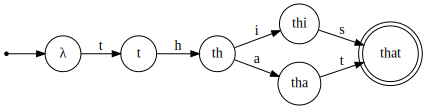

In [ ]:
from automata.fa.dfa import DFA

dfa01 = DFA.from_finite_language(
    input_symbols={'a','t', 'h','i','s','_','x'},
    language={"this","that"},
    as_partial=True
)

dfa01.show_diagram()

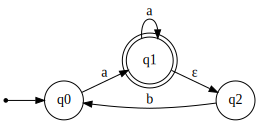

In [ ]:
from automata.fa.nfa import NFA

# NFA which matches strings beginning with "a", ending with "a", and
# containing no consecutive "b"s
nfa_starts_ends_a = NFA(
    states={"q0", "q1", "q2"},
    input_symbols={"a", "b"},
    transitions={
        "q0": {"a": {"q1"}},
        "q1": {"a": {"q1"}, "": {"q2"}},
        "q2": {"b": {"q0"}},
    },
    initial_state="q0",
    final_states={"q1"},
)

nfa_starts_ends_a.show_diagram("bb")

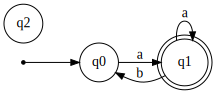

In [ ]:
# NFA which matches strings beginning with "a", ending with "a", and
# containing no consecutive "b"s
nfa_starts_ends_a_2 = NFA(
    states={"q0", "q1", "q2"},
    input_symbols={"a", "b"},
    transitions={
        "q0": {"a": {"q1"}},
        "q1": {"a": {"q1"}, "b": {"q0"}},
        # "q2": {"b": {"q0"}},
    },
    initial_state="q0",
    final_states={"q1"},
)

nfa_starts_ends_a_2.show_diagram("bb")

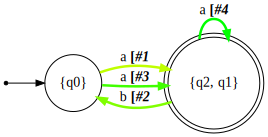

In [ ]:
dfa = DFA.from_nfa(nfa_starts_ends_a, retain_names=True, minify=False)
dfa.show_diagram("abaa") # "bbaa"

In [ ]:
for t in dfa.iter_transitions():
  print(t)

(frozenset({frozenset({'q2', 'q1'})}), frozenset({frozenset({'q0'})}), 'b')
(frozenset({frozenset({'q2', 'q1'})}), frozenset({frozenset({'q2', 'q1'})}), 'a')
(frozenset({frozenset({'q0'})}), frozenset({frozenset({'q2', 'q1'})}), 'a')
